In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 14 artists>

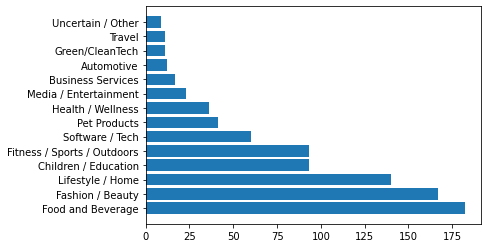

In [ ]:
df = pd.read_csv('/content/Shark Tank.csv')
number = dict(df['Industry'].value_counts())
plt.barh(list(number.keys()), list(number.values()))

<BarContainer object of 14 artists>

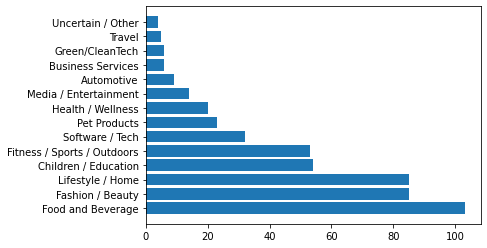

In [ ]:
deal_number = dict(df['Industry'][df['Deal'] == 'Yes'].value_counts())
plt.barh(list(deal_number.keys()), list(deal_number.values()))

<BarContainer object of 14 artists>

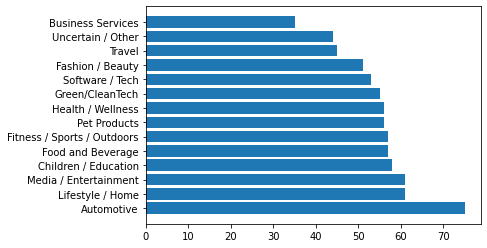

In [ ]:
conversion = {}

for i in number.keys():
  conversion[i] = np.around(deal_number[i]/number[i],2)*100
conversion = dict(sorted(conversion.items(),key=lambda x: x[1],reverse=True))

plt.barh(list(conversion.keys()),list(conversion.values()))

<BarContainer object of 3 artists>

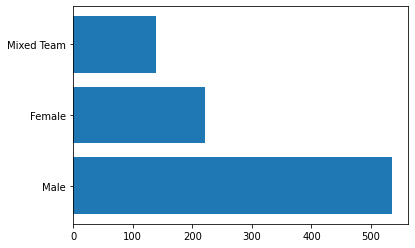

In [ ]:
gender_pitches = dict(df['Entrepreneur Gender'].value_counts())
plt.barh(list(gender_pitches.keys()),list(gender_pitches.values()))

<BarContainer object of 3 artists>

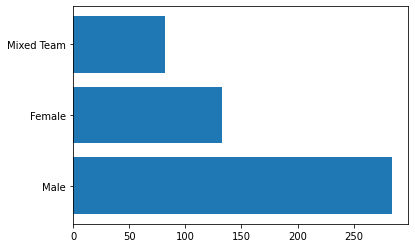

In [ ]:
gender_deals = dict(df['Entrepreneur Gender'][df['Deal']=='Yes'].value_counts())
plt.barh(list(gender_deals.keys()),list(gender_deals.values()))

<BarContainer object of 3 artists>

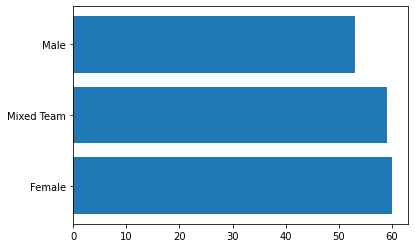

In [ ]:
gender_conversion = {}

for i in gender_pitches.keys():
  gender_conversion[i] = np.around(gender_deals[i]/gender_pitches[i],2)*100
gender_conversion = dict(sorted(gender_conversion.items(),key=lambda x: x[1],reverse=True))

plt.barh(list(gender_conversion.keys()),list(gender_conversion.values()))

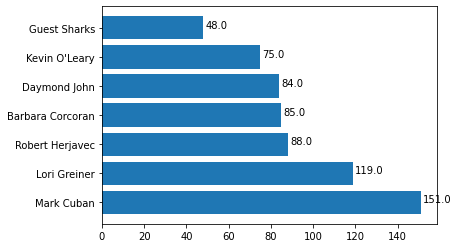

In [ ]:
sharks_deals = dict(zip(['Barbara Corcoran','Daymond John',"Kevin O'Leary",'Lori Greiner','Mark Cuban','Robert Herjavec','Guest Sharks'],[df['Barbara\nCorcoran'].sum(),df['Daymond\nJohn'].sum(),df["Kevin\nO'Leary"].sum(),df['Lori\nGreiner'].sum(),df['Mark\nCuban'].sum(),df['Robert Herjavec'].sum(),df['Guest'].sum()]))

sharks_deals = dict(sorted(sharks_deals.items(),key=lambda x: x[1],reverse=True))

fig, ax = plt.subplots()

ax.barh(list(sharks_deals.keys()),list(sharks_deals.values()))

for i, v in enumerate(sharks_deals.values()):
    ax.text(v + 1, i , str(v))

In [ ]:
df.isna().sum()

Season                   0
No. in series            0
Episode                  0
Company                  0
Description            710
Deal                     0
Industry                 0
Entrepreneur Gender      0
State                  651
Amount                 261
Equity                 261
Valuation              265
Amount.1               395
Equity.1               400
Valuation.1            401
Royalty Deal?          768
Loan?                  859
Barbara\nCorcoran      810
Mark\nCuban            744
Lori\nGreiner          776
Robert Herjavec        807
Daymond\nJohn          811
Kevin\nO'Leary         820
Guest                  847
# Sharks               178
$ per shark            437
Details / Notes        753
dtype: int64

In [ ]:
df.describe()

,Season,No. in series,Episode,Barbara\nCorcoran,Mark\nCuban,Lori\nGreiner,Robert Herjavec,Daymond\nJohn,Kevin\nO'Leary,Guest,# Sharks
count,895.000000,895.000000,895.000000,85.0,151.0,119.0,88.0,84.0,75.0,48.0,717.000000
mean,5.997765,12.565363,6.195821,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.835425
std,2.607852,7.710791,2.695790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822671
min,1.000000,1.000000,1.010000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,4.000000,6.000000,4.170000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
50%,6.000000,12.000000,6.180000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
75%,8.000000,19.000000,8.225000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
max,10.000000,29.000000,10.900000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.000000


In [ ]:
deals_df = df[df['Deal'] == 'Yes']

In [ ]:
deals_df = deals_df.dropna(subset=['Equity','Equity.1'])

In [ ]:
equityFloat = []
for i in range(len(list(deals_df['Equity']))):
  equityFloat.append(float(list(deals_df['Equity'])[i].split('%')[0]))

equityDealFloat = []
for i in range(len(list(deals_df['Equity.1']))):
  equityDealFloat.append(float(list(deals_df['Equity.1'])[i].split('%')[0]))

In [ ]:
deals_df['Equity'] = equityFloat
deals_df['Equity.1'] = equityDealFloat


In [ ]:
grouped_deals_industry_wise_equity_rise = deals_df.groupby(by=['Industry']).mean()[['Equity','Equity.1']]
grouped_deals_industry_wise_equity_rise = grouped_deals_industry_wise_equity_rise.rename(columns={'Equity':'Offered Equity', 'Equity.1':'Given Up Equity'})

In [ ]:
l = pd.DataFrame(np.around(grouped_deals_industry_wise_equity_rise['Given Up Equity']/grouped_deals_industry_wise_equity_rise['Offered Equity'],2),columns=['Times Equity Liquidated'])

grouped_deals_industry_wise_equity_rise = pd.concat([grouped_deals_industry_wise_equity_rise,l],axis=1)

In [ ]:
grouped_deals_industry_wise_equity_rise

,Offered Equity,Given Up Equity,Times Equity Liquidated
Industry,,,
Automotive,12.833333,37.266667,2.90
Business Services,10.960000,22.800000,2.08
Children / Education,12.406977,24.118605,1.94
Fashion / Beauty,14.053571,24.912500,1.77
Fitness / Sports / Outdoors,12.447368,19.944737,1.60
Food and Beverage,12.808219,23.053425,1.80
Green/CleanTech,14.500000,22.000000,1.52
Health / Wellness,12.468750,24.893750,2.00
Lifestyle / Home,13.190141,23.364789,1.77


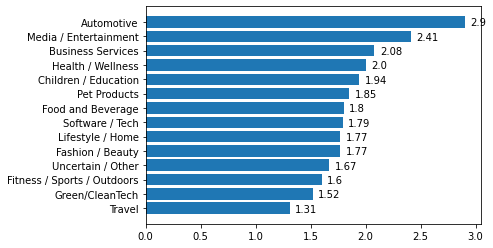

In [ ]:
fig, ax = plt.subplots()

new_dict = dict(sorted(dict(grouped_deals_industry_wise_equity_rise['Times Equity Liquidated']).items(),key=lambda x: x[1],reverse=False))

ax.barh(list(new_dict.keys()),list(new_dict.values()))

for i, v in enumerate(list(new_dict.values())):
    ax.text(v + 0.05 , i - 0.25, str(v))

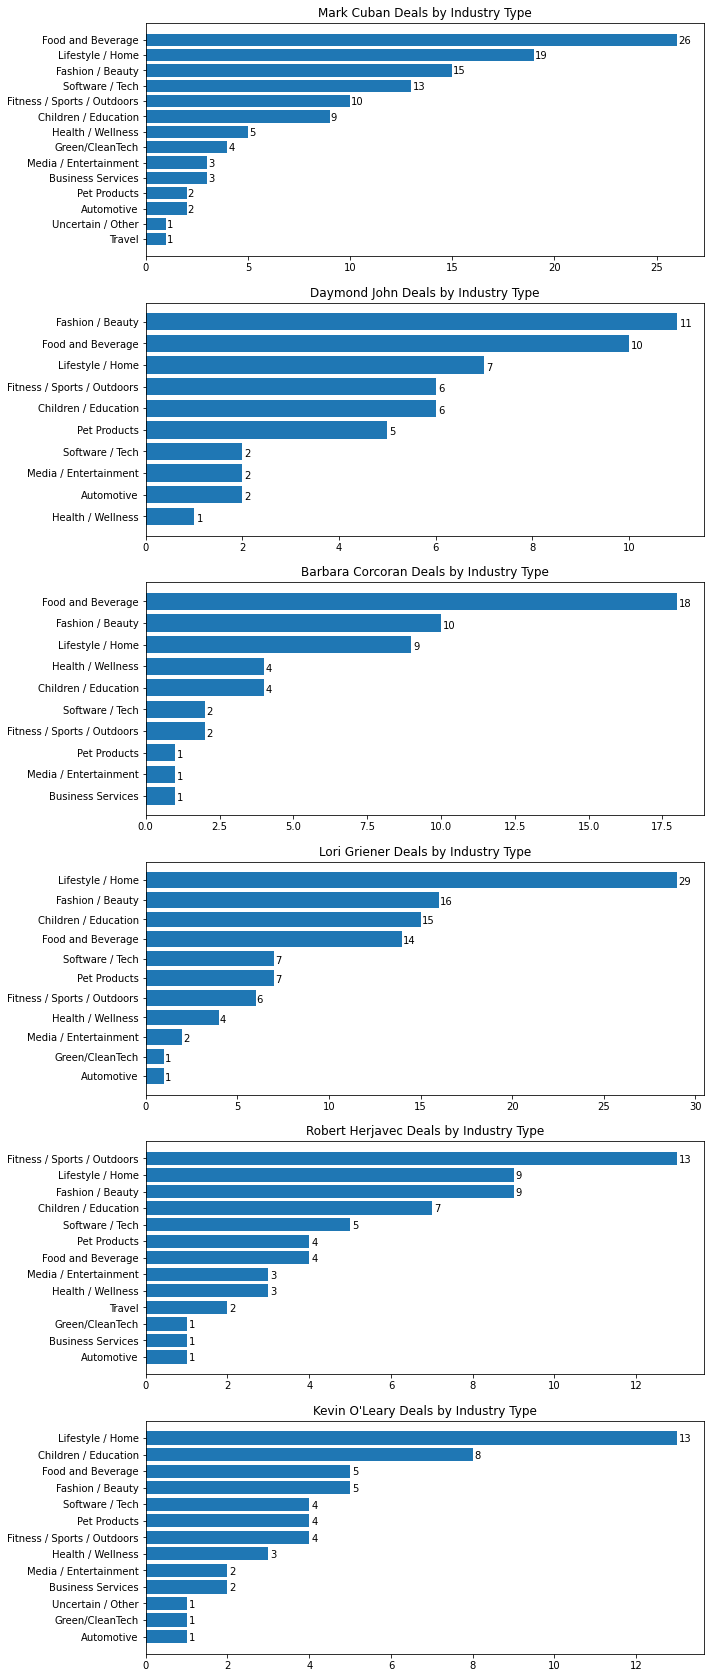

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(10,30))

mark_cuban_deals = deals_df[deals_df['Mark\nCuban'] == 1][['Deal','Industry']].groupby(by='Industry').count()
mark_cuban_deals.sort_values(by='Deal',inplace=True)
ax1.barh(mark_cuban_deals.index,mark_cuban_deals['Deal'])
ax1.set_title('Mark Cuban Deals by Industry Type')

for i, v in enumerate(mark_cuban_deals['Deal']):
    ax1.text(v + 0.05 , i - 0.25, str(v))

daymond_john_deals = deals_df[deals_df['Daymond\nJohn'] == 1][['Deal','Industry']].groupby(by='Industry').count()
daymond_john_deals.sort_values(by='Deal',inplace=True)
ax2.barh(daymond_john_deals.index,daymond_john_deals['Deal'])
ax2.set_title('Daymond John Deals by Industry Type')

for i, v in enumerate(daymond_john_deals['Deal']):
    ax2.text(v + 0.05 , i - 0.25, str(v))

barbara_deals = deals_df[deals_df['Barbara\nCorcoran'] == 1][['Deal','Industry']].groupby(by='Industry').count()
barbara_deals.sort_values(by='Deal',inplace=True)
ax3.barh(barbara_deals.index,barbara_deals['Deal'])
ax3.set_title('Barbara Corcoran Deals by Industry Type')

for i, v in enumerate(barbara_deals['Deal']):
    ax3.text(v + 0.05 , i - 0.25, str(v))

lori_deals = deals_df[deals_df['Lori\nGreiner'] == 1][['Deal','Industry']].groupby(by='Industry').count()
lori_deals.sort_values(by='Deal',inplace=True)
ax4.barh(lori_deals.index,lori_deals['Deal'])
ax4.set_title('Lori Griener Deals by Industry Type')

for i, v in enumerate(lori_deals['Deal']):
    ax4.text(v + 0.05 , i - 0.25, str(v))

robert_deals = deals_df[deals_df['Robert Herjavec'] == 1][['Deal','Industry']].groupby(by='Industry').count()
robert_deals.sort_values(by='Deal',inplace=True)
ax5.barh(robert_deals.index,robert_deals['Deal'])
ax5.set_title('Robert Herjavec Deals by Industry Type')

for i, v in enumerate(robert_deals['Deal']):
    ax5.text(v + 0.05 , i - 0.25, str(v))

kevin_deals = deals_df[deals_df["Kevin\nO'Leary"] == 1][['Deal','Industry']].groupby(by='Industry').count()
kevin_deals.sort_values(by='Deal',inplace=True)
ax6.barh(kevin_deals.index,kevin_deals['Deal'])
ax6.set_title("Kevin O'Leary Deals by Industry Type")

for i, v in enumerate(kevin_deals['Deal']):
    ax6.text(v + 0.05 , i - 0.25, str(v))

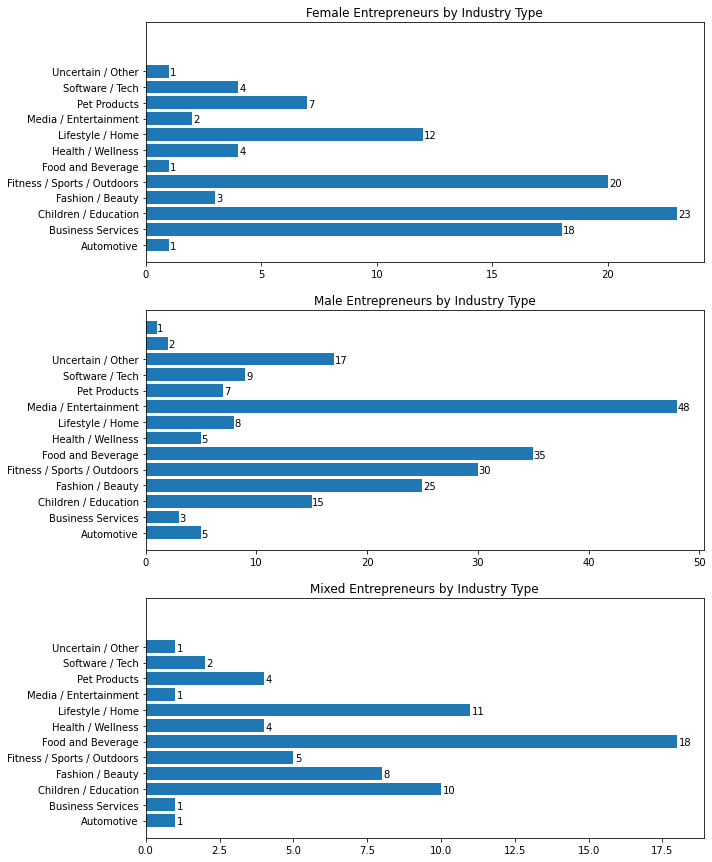

In [ ]:
deals_by_gender_industry = dict(deals_df.groupby(by=['Entrepreneur Gender','Industry']).count()['Deal'])


female_by_industry = {k[1]:v for k,v in deals_by_gender_industry.items() if 'Female' in k}
male_by_industry = {k[1]:v for k,v in deals_by_gender_industry.items() if 'Male' in k}
mixed_by_industry = {k[1]:v for k,v in deals_by_gender_industry.items() if 'Mixed Team' in k}


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,sharey=True,figsize=(10, 15))

ax1.barh(list(female_by_industry.keys()),list(female_by_industry.values()))
ax1.set_title('Female Entrepreneurs by Industry Type')

for i, v in enumerate(list(female_by_industry.values())):
    ax1.text(v + 0.05 , i - 0.25, str(v))

ax2.barh(list(male_by_industry.keys()),list(male_by_industry.values()))
ax2.set_title('Male Entrepreneurs by Industry Type')

for i, v in enumerate(list(male_by_industry.values())):
    ax2.text(v + 0.05 , i - 0.25, str(v))

ax3.barh(list(mixed_by_industry.keys()),list(mixed_by_industry.values()))
ax3.set_title('Mixed Entrepreneurs by Industry Type')

for i, v in enumerate(list(mixed_by_industry.values())):
    ax3.text(v + 0.05 , i - 0.25, str(v))

plt.show()

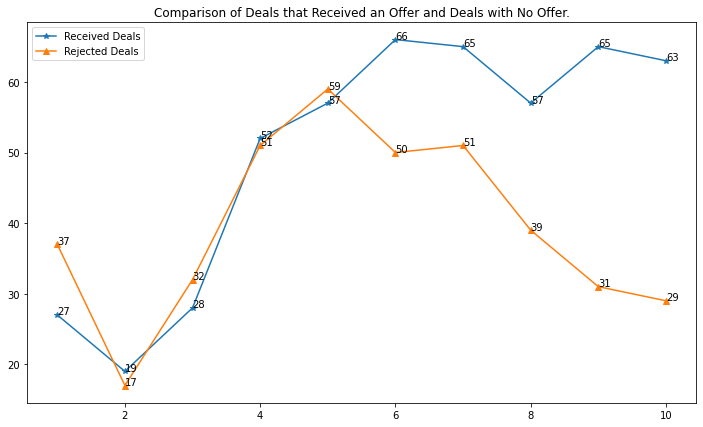

In [ ]:
season_list =[i for i in range(1,11)]
yes_season = []
no_season = []
for i in season_list:
  for j in range(0,2):
    if j == 0:
      no_season.append(int(df.groupby(by=['Season','Deal']).count()['Episode'][i][j]))
    if j == 1:
      yes_season.append(int(df.groupby(by=['Season','Deal']).count()['Episode'][i][j]))

fig, ax = plt.subplots(figsize=(12,7))

ax.plot(season_list,yes_season,label='Received Deals',marker='*')
ax.plot(season_list,no_season,label='Rejected Deals',marker='^')
ax.legend()

for i, v in enumerate(yes_season):
    ax.text(i+1 , v+0.05, str(v))

for i, v in enumerate(no_season):
    ax.text(i+1 , v+0.05, str(v))

ax.set_title('Comparison of Deals that Received an Offer and Deals with No Offer.')

plt.show()

In [ ]:
val =  [float(i.replace(',','').replace('$','')) for i in deals_df['Valuation']]
deals_df['Valuation'] = val
 
val_1 = [float(str(j).replace(',','').replace('$','')) for j in deals_df['Valuation.1']]
deals_df['Valuation.1'] = val_1

In [ ]:
prediction_df = df[['Industry','Amount','Equity','Deal']]

In [ ]:
prediction_df.dropna(inplace=True)

amt = [float(str(j).replace(',','').replace('$','')) for j in prediction_df['Amount']]
prediction_df['Amount'] = amt

eqt = [float(str(j).replace('%','')) for j in prediction_df['Equity']]
prediction_df['Equity'] = eqt


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-280-a7e411c80fc1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_df['Amount'] = amt
<ipython-input-280-a7e411c80fc1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot = pd.get_dummies(prediction_df['Industry'])

X = pd.concat([one_hot, prediction_df[['Amount', 'Equity']]], axis=1)
y = prediction_df['Deal']


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)

clf = GaussianNB()

clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Test Accuracy:", accuracy)
print("Train Accuracy:", accuracy_train)

Test Accuracy: 0.59375
Train Accuracy: 0.5929824561403508


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)

clf = MultinomialNB()

clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Test Accuracy:", accuracy)
print("Train Accuracy:", accuracy_train)

Test Accuracy: 0.546875
Train Accuracy: 0.5877192982456141


Test Accuracy: 0.53125 
Train Accuracy 0.6842105263157895


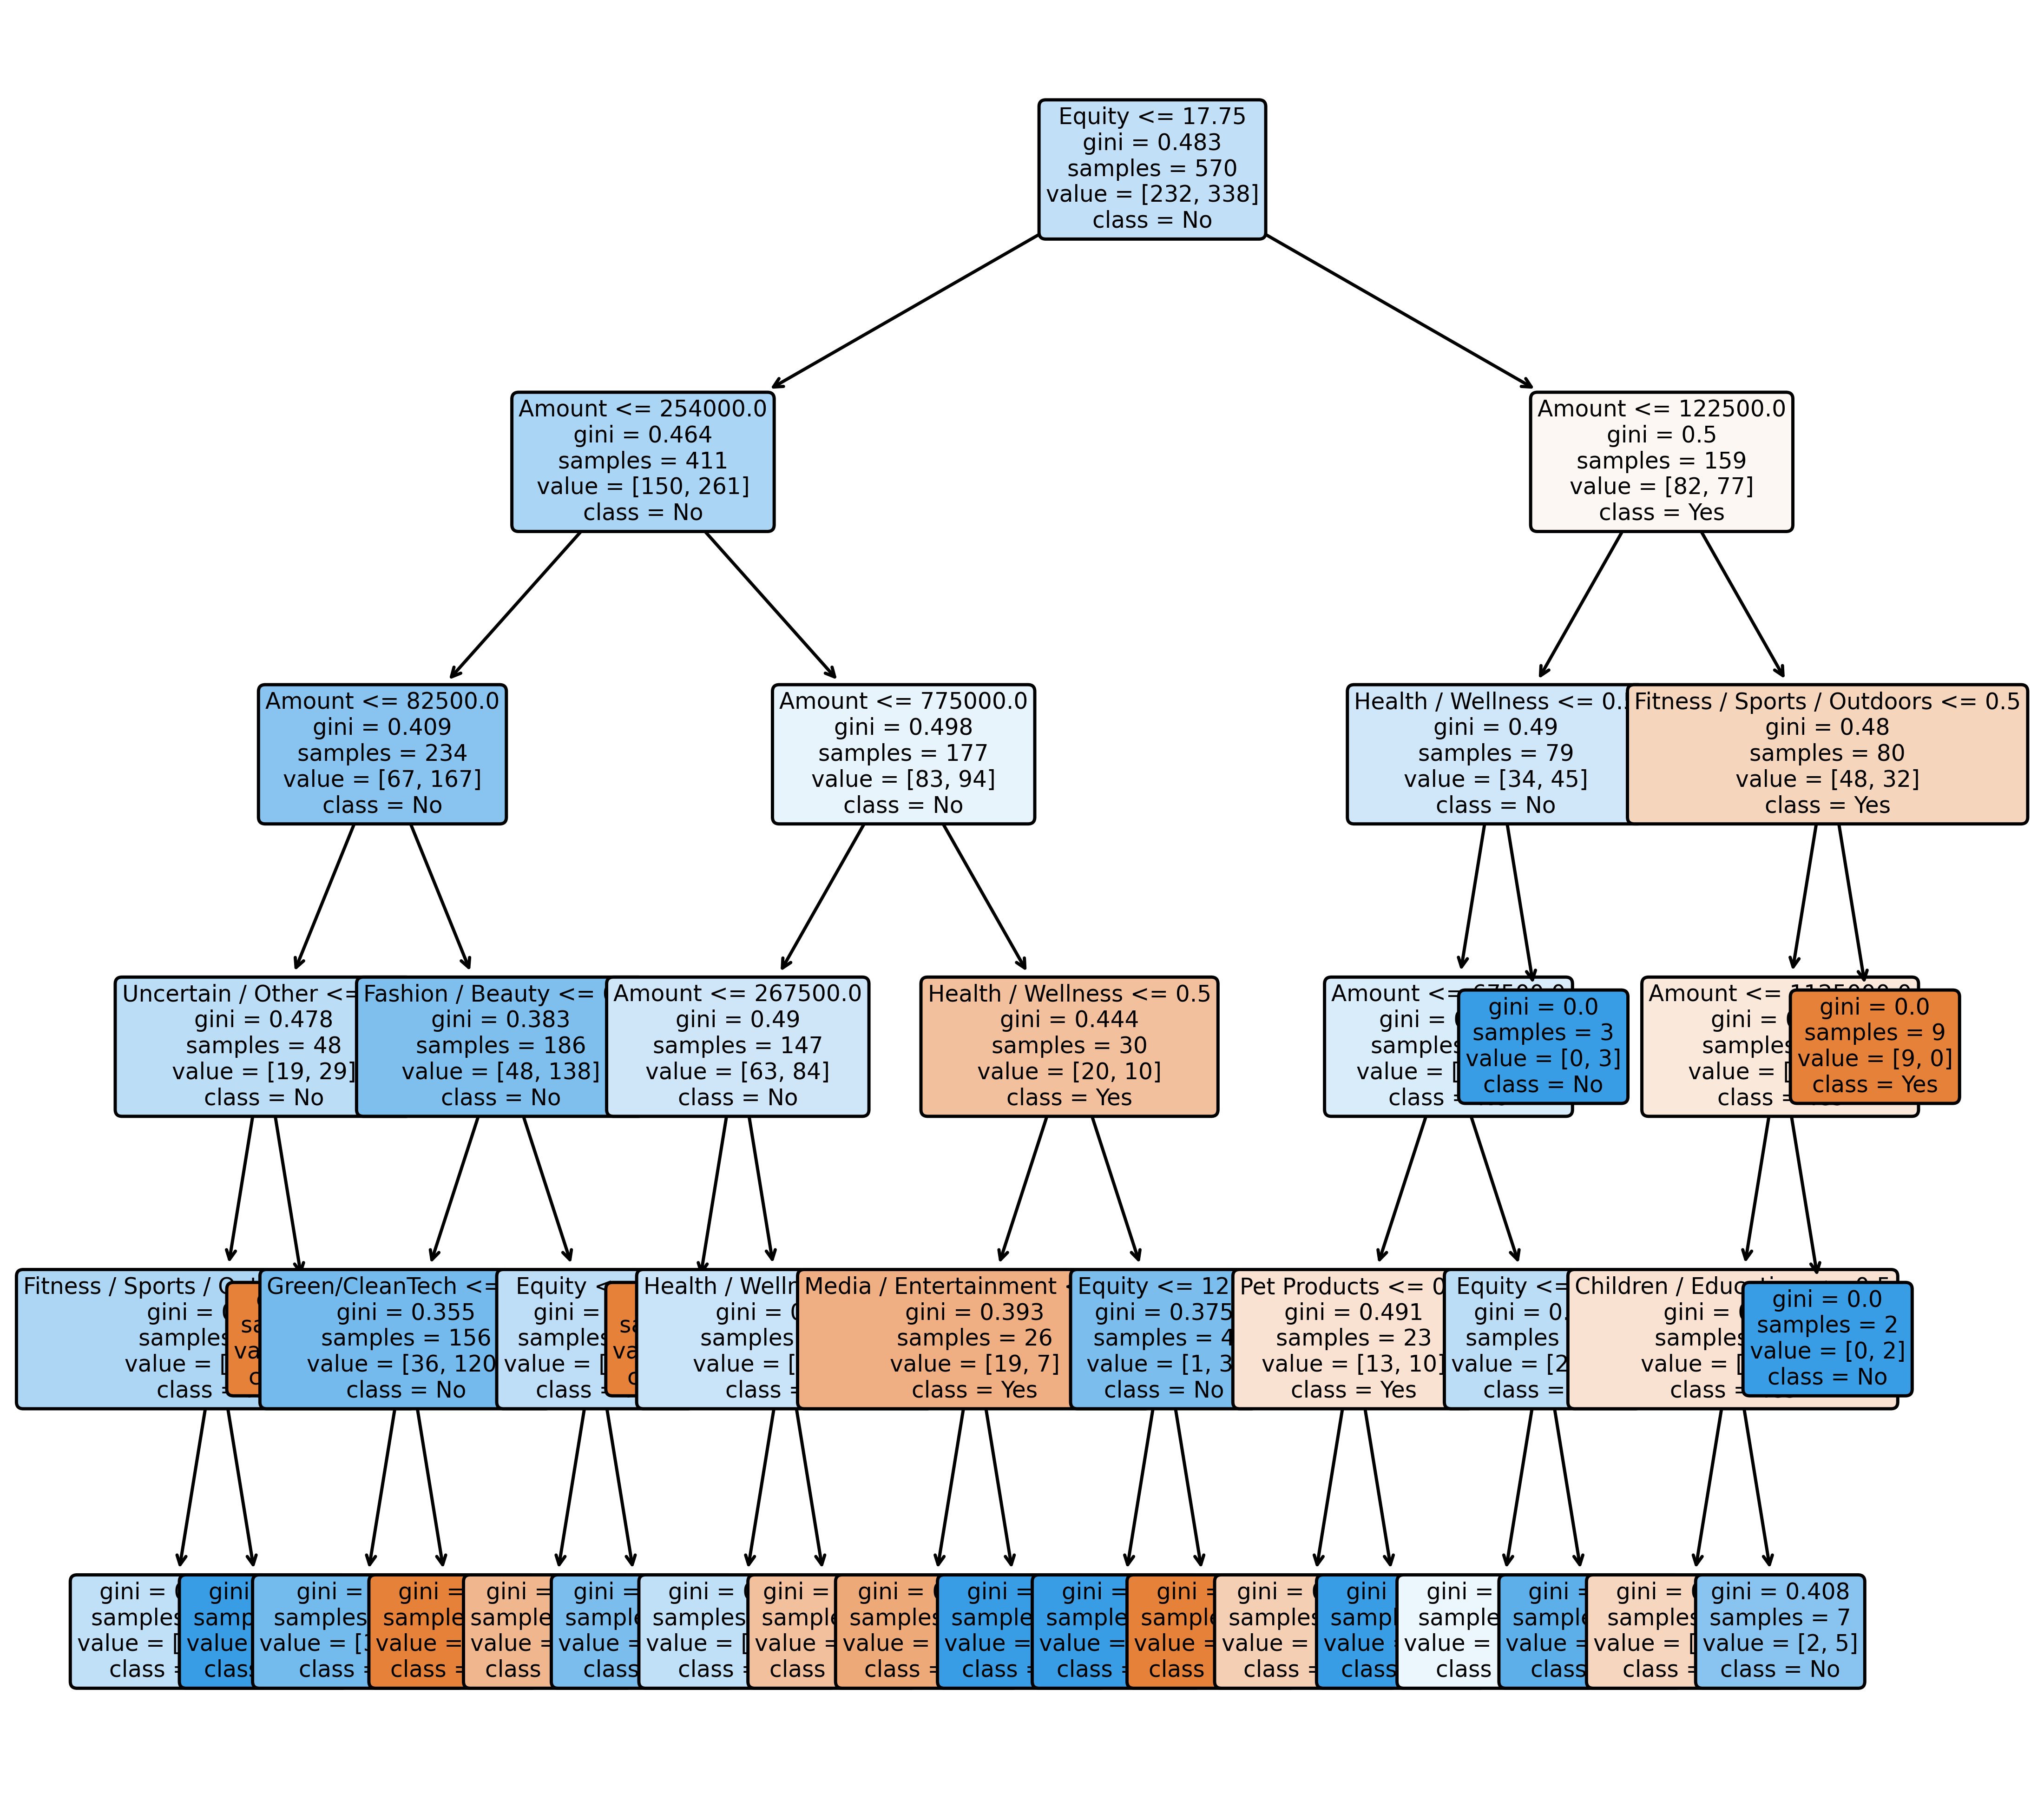

In [ ]:
from pandas.core.arrays import categorical
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)

clf_tree = tree.DecisionTreeClassifier(max_depth=5)

clf_tree.fit(X_train, y_train)

a = clf_tree.predict(X_test)
b = clf_tree.predict(X_train)

print('Test Accuracy:',accuracy_score(a,y_test), '\nTrain Accuracy',accuracy_score(b,y_train))

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=500)

fn = list(X.columns)
cn = ['Yes','No']

tree.plot_tree(clf_tree,filled = True,feature_names=fn,class_names=cn,rounded=True,fontsize=7);

fig.savefig('imagename.png')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy_knn = []
accuracy_knn_train = []
neighbors = []
for i in range(1,len(y_train)):
  
  # Create an instance of the KNeighborsClassifier class
  knn = KNeighborsClassifier(n_neighbors=i)

  # Fit the model to the training data
  knn.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = knn.predict(X_test)
  y_pred_train = knn.predict(X_train)

  # Calculate the accuracy of the model
  accuracy_knn.append(accuracy_score(y_test, y_pred))
  accuracy_knn_train.append(accuracy_score(y_train, y_pred_train))
  neighbors.append(i)

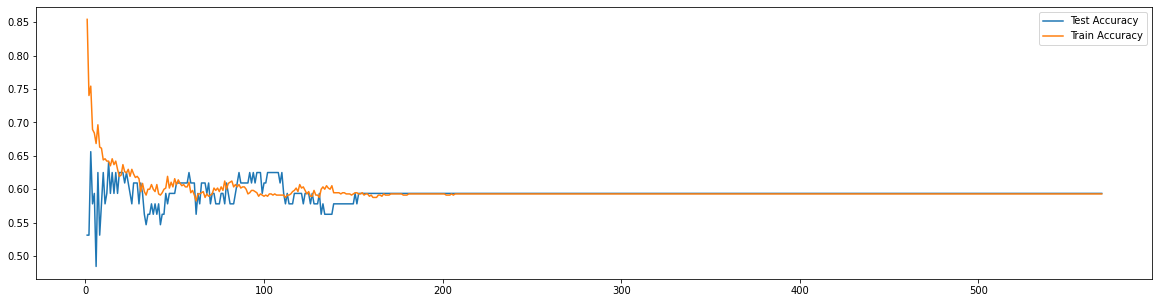

In [ ]:
fig, ax =plt.subplots(figsize=(20,5))

ax.plot(neighbors,accuracy_knn,label='Test Accuracy')
ax.plot(neighbors,accuracy_knn_train,label='Train Accuracy')
ax.legend()

plt.show()